In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("../csv/genre_clean.csv")

In [5]:
df.head()

,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,y
0,0.083045,1784.165850,3805.839606,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704889,15.343150,-12.274110,10.976572,-8.326573,8.803792,-3.672300,1
1,0.056040,1530.176679,3550.522098,-207.501694,123.991264,8.955127,35.877647,2.907320,21.510468,-8.560436,23.370686,-10.099661,11.900496,-5.555639,5.376327,-2.231760,1
2,0.076291,1552.811865,3042.260232,-90.722595,140.446304,-29.093889,31.684334,-13.984505,25.764742,-13.664875,11.639934,-11.783642,9.718760,-13.133803,5.791199,-8.907628,1
3,0.033309,1070.106615,2184.745799,-199.544205,150.090897,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,-3.200653,6.079319,-2.480174,1
4,0.101461,1835.004266,3579.757627,-160.337708,126.219635,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498434,-11.793437,1.207255,-13.088418,-2.813867,-6.933384,1


### Defining function for Min_Max scaling and Extracting Features and Target Variable

In [6]:
def min_max_scalar(directory):
    
    ''' This function takes in a directory of data file and apply 
    min_max scaling, then retun Independent features and Target Variable
    in different dataframes. '''
    
    df = pd.read_csv(directory)
    y = df['y']
    X = df.drop(columns=['y'])
    scalar = MinMaxScaler()
    scalar.fit(X)
    trans = scalar.transform(X)
    df_new = pd.DataFrame(trans)
    
    return(df_new,y)

In [7]:
X,y = min_max_scalar('../csv/genre_clean.csv')

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.242545,0.314117,0.385532,0.738100,0.632371,0.482433,0.614443,0.462466,0.639217,0.351102,0.544576,0.381428,0.586480,0.433846,0.633516,0.587829
1,0.135778,0.248405,0.353329,0.580010,0.644806,0.674332,0.549183,0.594300,0.678448,0.445051,0.653163,0.424254,0.610012,0.494774,0.545250,0.623332
2,0.215844,0.254261,0.289224,0.776555,0.729382,0.414705,0.507010,0.354124,0.736259,0.351832,0.494483,0.391088,0.554444,0.328144,0.555934,0.458799
3,0.045909,0.129376,0.181068,0.593403,0.778954,0.651866,0.458480,0.578149,0.579569,0.513140,0.462649,0.608218,0.514173,0.546556,0.563354,0.617210
4,0.315353,0.327270,0.357017,0.659389,0.656260,0.370394,0.411100,0.091165,0.533615,0.174918,0.343774,0.390895,0.337660,0.329142,0.334333,0.507456


## Machine Learning using KNN and Evaluation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

0.54


<AxesSubplot:>

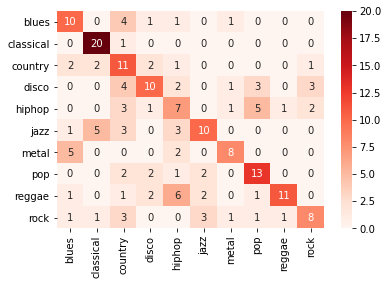

In [52]:
# Performing KNN and evaluating the results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)
dtc = KNeighborsClassifier(n_neighbors=10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
label = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
sns.heatmap(cm, annot= True, cmap='Reds', xticklabels= label, yticklabels= label)

In [28]:
# Performing RandomForestClassifier and evaluating the results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)
dtc = RandomForestClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.565


### Our model has an accuracy of 53%, mainly due to the small size of the Data Set, which can be increased in future

# Saving Final Model For Predictions

In [8]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

In [9]:
# Saving the model using joblib
import joblib

In [10]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']